In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("../data/cleaned/transformed.csv")

In [3]:
X = df.drop(["churn"], axis=1)
Y = df["churn"]

In [4]:
Y.value_counts()

churn
1    280492
0    224714
Name: count, dtype: int64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=3984)
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((353644, 10), (151562, 10)), ((353644,), (151562,)))

In [6]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier()
}

In [7]:
cv = KFold(random_state=98347, n_splits=5, shuffle=True)

In [8]:
models_evaluation = []

evaluation_metrics = ["accuracy", "precision", "recall"]
for model_name, estimator in models.items():
    scores = cross_validate(estimator, x_train, y_train, cv=cv, n_jobs=-1, scoring=evaluation_metrics)
    models_evaluation.append(
        {"model_name" : model_name, "accuracy" : scores["test_accuracy"].mean(), "precision" : scores["test_precision"].mean(), "recall" :  scores["test_recall"].mean()}
    )
    

In [9]:
evaluation_df = pd.DataFrame(models_evaluation)
evaluation_df

,model_name,accuracy,precision,recall
0,LogisticRegression,0.819635,0.846056,0.824864
1,RandomForestClassifier,0.935653,0.897350,0.998154
2,DecisionTreeClassifier,0.882930,0.902794,0.884098


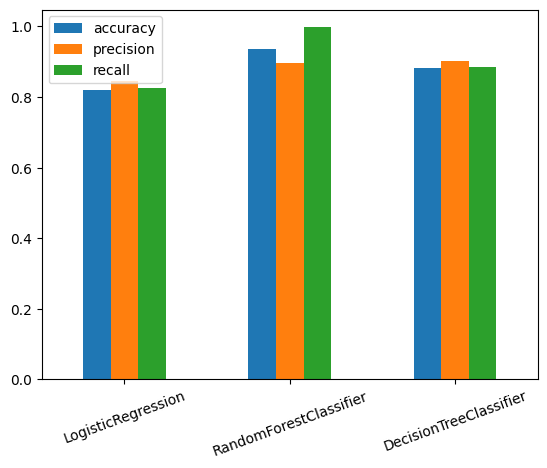

In [10]:
evaluation_df.plot(kind="bar")
plt.xticks([0, 1, 2], evaluation_df["model_name"].values, rotation=20)
plt.show()

### ***HyperParameterTune for best model***

In [11]:
params = {
    "max_depth" : [5, 10, 15],
    "n_estimators" : [100, 200, 300],
    "min_samples_split" : [4, 6, 10]
}

best_model = RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1), param_distributions=params, n_jobs=-1, cv=cv)

best_model.fit(x_train, y_train)

/home/adnan/Documents/customer-churn-prediction/.venv/lib64/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=98347, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_split': [4, 6, 10],
                                        'n_estimators': [100, 200, 300]})

In [12]:
best_model.best_params_

{'n_estimators': 300, 'min_samples_split': 6, 'max_depth': 15}

In [13]:
random_forest_cl = RandomForestClassifier(**best_model.best_params_)

model = random_forest_cl.fit(x_train, y_train)

In [14]:
y_pred = model.predict(x_test)

In [15]:
accuracy_score(y_pred, y_test) * 100

93.61713358229635